In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../../data/processed_data/full_df.csv')
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC
0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,137881.0,...,2.17,5.72,2.47,3.38,4.38,1.38,3.14,5.01,1.89,2.0
1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,449589.0,...,2.31,6.31,4.94,4.08,9.38,2.24,2.06,6.11,2.19,3.0
2,1,9,1009,AL,Blount County,2010,1.0,8929.7,787.0,155580.0,...,5.66,7.47,3.39,3.55,4.31,1.23,3.12,4.62,2.07,1.0
3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,2035.0,313874.0,...,3.73,6.46,2.70,4.00,3.78,1.55,2.96,3.06,2.24,3.0
4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,645.0,126516.0,...,1.88,4.71,3.84,2.78,6.30,2.41,1.38,3.71,2.03,4.0


In [3]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
with open("../Regression Analysis/factors.txt") as f:
     factors = f.read().splitlines()
with open("../Regression Analysis/outcomes.txt") as f:
     outcomes = f.read().splitlines()
df = df[identifying_fields + factors + outcomes]
print(df.shape[0])
df.dropna(inplace=True)
print(df.shape[0])
df.head()

6280
4492


,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,...,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate
844,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,41.5,...,3.39,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7
845,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,47.6,...,3.15,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2
846,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,39.1,...,4.53,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4
847,AL,Cherokee County,2011,0.661,0.107,0.401,-24413.0,38028.0,61.766667,38.3,...,3.81,4.66,1.86,8.76,1.10,5.78,5.82,6.0,4.4,38.4
848,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,37.1,...,3.76,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4


In [4]:
avg_precip = df['Average Precipitation'].mean()
print(avg_precip)

3.5213568566340165


In [5]:
med_precip = df['Average Precipitation'].median()
print(med_precip)

3.5025


In [6]:
AVG = True
precip_threshold = avg_precip if AVG else med_precip

In [7]:
def classify_precip_treatment(row):
    return 1 if row['Average Precipitation'] >= precip_threshold else 0

In [8]:
df['precip_treated'] = df.apply(classify_precip_treatment, axis=1)
df.head()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,precip_treated
844,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,41.5,...,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7,1
845,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,47.6,...,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2,1
846,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,39.1,...,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4,1
847,AL,Cherokee County,2011,0.661,0.107,0.401,-24413.0,38028.0,61.766667,38.3,...,4.66,1.86,8.76,1.10,5.78,5.82,6.0,4.4,38.4,1
848,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,37.1,...,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4,1


In [9]:
df[df.precip_treated==0].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,March Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,precip_treated
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,...,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.0
mean,2013.561404,0.814163,0.080326,0.613320,4275.571699,52651.443860,54.499273,32.489342,35.356053,46.130175,...,2.793294,2.666741,2.692868,2.504346,1.809474,2.661535,2.566228,3.469912,17.178947,0.0
std,1.901410,0.090015,0.029798,0.100538,12065.892202,13245.180428,7.863592,10.940040,12.486262,11.146695,...,1.919678,1.924111,1.834155,1.753573,1.231045,1.843251,1.535881,0.621099,8.052460,0.0
min,2011.000000,0.267000,0.017000,0.333000,-99281.000000,27268.000000,24.250000,-20.000000,-0.500000,5.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.800000,4.400000,0.0
25%,2012.000000,0.763000,0.060968,0.543048,687.427000,43459.250000,48.687500,25.100000,27.600000,37.600000,...,1.207500,1.177500,1.250000,1.090000,0.840000,1.250000,1.000000,3.100000,11.700000,0.0
50%,2013.000000,0.829312,0.075150,0.615000,1850.211765,50037.500000,53.191667,31.000000,34.400000,46.600000,...,2.710000,2.550000,2.435000,2.350000,1.590000,2.440000,2.000000,3.450000,15.600000,0.0
75%,2016.000000,0.878188,0.094825,0.683645,5348.000000,58084.250000,60.514583,40.500000,45.100000,55.025000,...,4.020000,3.830000,3.970000,3.580000,2.540000,3.760000,3.000000,3.800000,20.500000,0.0
max,2016.000000,1.000000,0.297000,0.883019,106755.000000,122641.000000,77.100000,65.500000,68.400000,73.500000,...,9.710000,11.980000,10.680000,11.210000,8.020000,17.190000,9.000000,7.000000,98.500000,0.0


In [10]:
df[df.precip_treated==1].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,March Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,precip_treated
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0
mean,2013.382459,0.802416,0.083039,0.587951,4962.929368,49621.636076,58.550000,38.087703,39.729476,48.862975,...,4.929448,4.925470,4.584259,4.049448,4.228002,5.480023,2.508590,3.688834,17.218987,1.0
std,1.826292,0.091864,0.023280,0.097512,10795.207962,12614.563160,7.946170,11.691027,12.377803,11.232884,...,2.734106,3.416649,2.859308,3.200324,3.067210,3.396444,1.545457,0.681146,7.040128,0.0
min,2011.000000,0.185000,0.032823,0.307826,-68894.000000,28459.000000,29.491667,1.900000,3.300000,15.200000,...,0.000000,0.000000,0.000000,0.000000,0.020000,0.140000,1.000000,1.800000,4.300000,1.0
25%,2012.000000,0.745000,0.066000,0.522329,898.872001,41001.000000,52.560417,29.575000,31.200000,40.400000,...,3.120000,2.680000,2.510000,1.850000,2.180000,3.590000,1.000000,3.200000,12.400000,1.0
50%,2013.000000,0.810492,0.080315,0.586387,2203.656837,46400.500000,58.045833,37.700000,39.500000,48.300000,...,4.630000,4.230000,4.100000,3.510000,3.515000,4.860000,2.000000,3.600000,15.800000,1.0
75%,2015.000000,0.870000,0.097000,0.653170,5404.766469,54861.250000,63.712500,45.400000,47.400000,56.700000,...,6.442500,6.442500,6.030000,5.062500,5.500000,6.420000,3.000000,4.100000,20.700000,1.0
max,2016.000000,1.000000,0.191000,0.880205,85361.000000,119525.000000,78.566667,72.500000,72.000000,75.500000,...,18.470000,22.950000,20.790000,27.260000,24.650000,34.330000,9.000000,7.000000,65.600000,1.0


<AxesSubplot:xlabel='RUCC', ylabel='Count'>

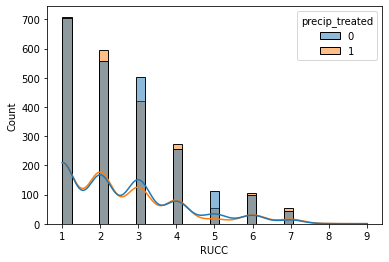

In [11]:
sns.histplot(data=df, x="RUCC", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Count'>

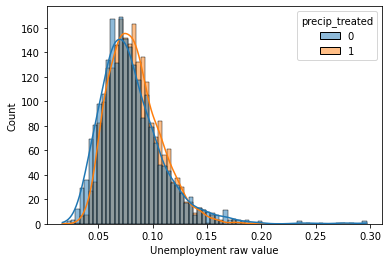

In [12]:
sns.histplot(data=df, x="Unemployment raw value", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='Median household income raw value', ylabel='Count'>

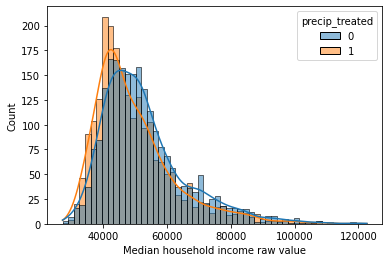

In [13]:
sns.histplot(data=df, x="Median household income raw value", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='High school graduation raw value', ylabel='Count'>

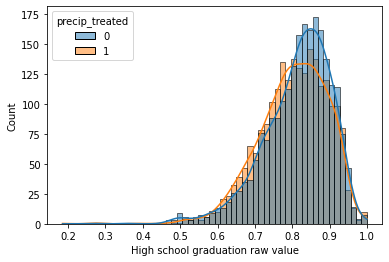

In [14]:
sns.histplot(data=df, x="High school graduation raw value", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='Some college raw value', ylabel='Count'>

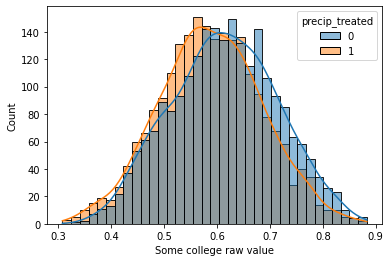

In [15]:
sns.histplot(data=df, x="Some college raw value", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='Poor mental health days raw value', ylabel='Count'>

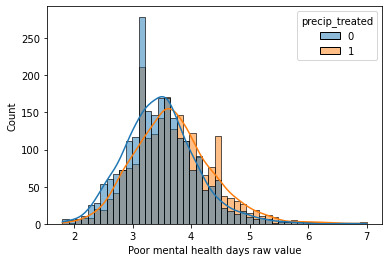

In [16]:
sns.histplot(data=df, x="Poor mental health days raw value", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='Crude Rate', ylabel='Count'>

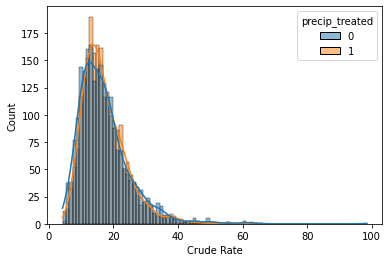

In [17]:
sns.histplot(data=df, x="Crude Rate", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='Ratio of population to mental health providers', ylabel='Count'>

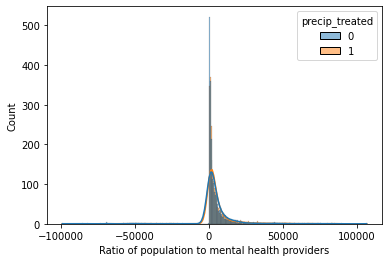

In [18]:
sns.histplot(data=df, x="Ratio of population to mental health providers", hue="precip_treated", kde=True)

<AxesSubplot:xlabel='Average Precipitation', ylabel='Count'>

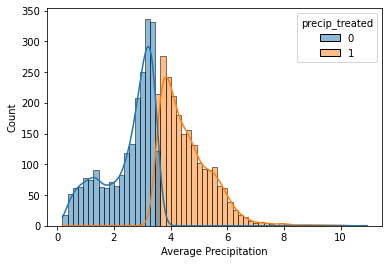

In [19]:
sns.histplot(data=df, x="Average Precipitation", hue="precip_treated", kde=True)

In [20]:
df.precip_treated.value_counts()

0    2280
1    2212
Name: precip_treated, dtype: int64

# Unadjusted ATE

In [21]:
# Unadjusted ATE - Poor mental health days
print('Difference in Sample Averages = {:0.3f}'.format(df[df.precip_treated== 1]['Poor mental health days raw value'].mean() - df[df.precip_treated== 0]['Poor mental health days raw value'].mean()))

Difference in Sample Averages = 0.219


In [22]:
# Unadjusted ATE - Suicide rate
print('Difference in Sample Averages = {:0.3f}'.format(df[df.precip_treated== 1]['Crude Rate'].mean() - df[df.precip_treated== 0]['Crude Rate'].mean()))

Difference in Sample Averages = 0.040


In [23]:
def OLS_estimate(outcome, covariates):
    covariates = sm.add_constant(covariates) # adding a constant 
    model = sm.OLS(outcome, covariates)
    result = model.fit()
    print(result.summary())

In [24]:
OLS_estimate(df['Poor mental health days raw value'], df['precip_treated'])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.027
Model:                                           OLS   Adj. R-squared:                  0.027
Method:                                Least Squares   F-statistic:                     126.8
Date:                               Sun, 05 Dec 2021   Prob (F-statistic):           4.95e-29
Time:                                       22:07:09   Log-Likelihood:                -4447.2
No. Observations:                               4492   AIC:                             8898.
Df Residuals:                                   4490   BIC:                             8911.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                     coef    std err          t      P>|t|  

In [25]:
OLS_estimate(df['Crude Rate'], df['precip_treated'])

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03140
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.859
Time:                        22:07:17   Log-Likelihood:                -15466.
No. Observations:                4492   AIC:                         3.094e+04
Df Residuals:                    4490   BIC:                         3.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.1789      0.159    108.

In [26]:
df.groupby('precip_treated')['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Temperature', 'RUCC'].agg(['mean'])

/var/folders/52/9bx80g11757dncrhv6pqh9f40000gn/T/ipykernel_29106/2618202070.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('precip_treated')['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Temperature', 'RUCC'].agg(['mean'])


,Crude Rate,Poor mental health days raw value,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,RUCC
,mean,mean,mean,mean,mean,mean,mean,mean,mean
precip_treated,,,,,,,,,
0,17.178947,3.469912,0.814163,0.080326,0.613320,4275.571699,52651.443860,54.499273,2.566228
1,17.218987,3.688834,0.802416,0.083039,0.587951,4962.929368,49621.636076,58.550000,2.508590


Counties that are hotter than average (precip_treated = 1) on average, have a worse ratio of population to mental health providers and lower median household income than counties that are cooler than average.

# Linear Regressions

In [27]:
# Linear Regressions accounting for control variables based on above analysis
outcome = df['Poor mental health days raw value']
covariates = df[['precip_treated', 'Average Temperature', 'RUCC']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.128
Model:                                           OLS   Adj. R-squared:                  0.127
Method:                                Least Squares   F-statistic:                     218.6
Date:                               Sun, 05 Dec 2021   Prob (F-statistic):          2.26e-132
Time:                                       22:07:59   Log-Likelihood:                -4203.4
No. Observations:                               4492   AIC:                             8415.
Df Residuals:                                   4488   BIC:                             8440.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

In [28]:
outcome = df['Crude Rate']
covariates = df[['precip_treated', 'Average Temperature', 'RUCC']]
OLS_estimate(outcome, covariates)

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     780.0
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:08:10   Log-Likelihood:                -14524.
No. Observations:                4492   AIC:                         2.906e+04
Df Residuals:                    4488   BIC:                         2.908e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.6324    

Optimization terminated successfully.
         Current function value: 0.657491
         Iterations 5


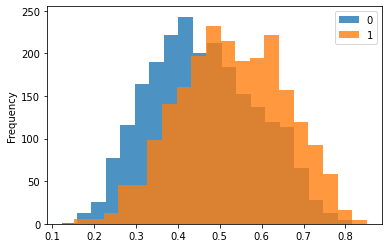

In [29]:
def gen_pscore(data, outcome, covariates):
    model = sm.Logit(outcome, covariates)
    result = model.fit()
    data['pscore'] = result.predict(covariates)
    data.groupby(['precip_treated']).pscore.plot(kind='hist', bins=20, alpha=0.8, legend=True)

gen_pscore(df, df['precip_treated'], df[['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Temperature', 'RUCC']])

In [30]:
def trim(data):
  control_data = data[data['precip_treated'] == 0]
  treat_data = data[data['precip_treated'] == 1]

  min_control, min_treat = control_data.pscore.min(), treat_data.pscore.min()
  max_control, max_treat = control_data.pscore.max(), treat_data.pscore.max()

  min_support = max(min_control, min_treat)
  max_support = min(max_control, max_treat)

  trim_data = data.loc[((data.pscore >= min_support) & (data.pscore <= max_support)),:]
  
  return trim_data

trim_df = trim(df)
trim_df.groupby(['precip_treated']).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
precip_treated,,,,,,,,
0,2279.0,0.460638,0.128056,0.160508,0.363295,0.450279,0.553325,0.816403
1,2207.0,0.528777,0.124842,0.153233,0.438131,0.526048,0.623029,0.809539


In [31]:
def Nearest_Neighbor_Pair(treated_df, non_treated_df):
    treated_x = treated_df['pscore'].values
    non_treated_x = non_treated_df['pscore'].values

    nbrs = NearestNeighbors(n_neighbors=1).fit(np.expand_dims(non_treated_x, axis= 1))
    distances, indices = nbrs.kneighbors(np.expand_dims(treated_x, axis= 1))
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

treated = trim_df[trim_df['precip_treated'] == 1]
non_treated = trim_df[trim_df['precip_treated'] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = 0.047


In [32]:
def compute_smd(covariates_table: pd.DataFrame, covariates: list, round_digits: int=4) -> pd.DataFrame:
    covariates_smds = []
    for var in covariates:
        covariates_values = covariates_table[var].values
        neg_mean = covariates_values[0, 0]
        neg_std = covariates_values[0, 1]
        pos_mean = covariates_values[1, 0]
        pos_std = covariates_values[1, 1]

        smd = (pos_mean - neg_mean) / np.sqrt((pos_std ** 2 + neg_std ** 2) / 2)
        smd = round(abs(smd), round_digits)
        covariates_smds.append(smd)

    return pd.DataFrame({'features': covariates, 'smd': covariates_smds})

covariates_list = ['Average Temperature', 'RUCC']
agg_operations = {'precip_treated': 'count'}
agg_operations.update({
    covariate: ['mean', 'std'] for covariate in covariates_list
})

# Combine treated and matched_df
covariates_table = pd.concat([treated, matched_df]).groupby('precip_treated').agg(agg_operations)
covariates_table.head()

# standardize mean difference, <= 0.25
# Put both variables in there, unemployment/education balanced
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

              features     smd
0  Average Temperature  0.0600
1                 RUCC  0.0388


In [33]:
def stratified_matching(data):
  mybins = np.arange(0.0, 1.1, 0.1)
  mylabels = np.arange(1, 11)
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)

  # calculate the weights for each strata
  strata_w = data[data['precip_treated'] == 1].groupby('strata').size()/data[data['precip_treated'] == 1].groupby('strata').size().sum()
  
  # calculate the ATT for each strata
  strata_ate = data[data['precip_treated'] == 1].groupby('strata')['Poor mental health days raw value'].mean() - data[data['precip_treated'] == 0].groupby('strata')['Poor mental health days raw value'].mean()

  # stratefied matching estimate 
  stratefied_ate = (strata_w * strata_ate).sum()  
  print("The stratification matching estimate is {}".format(round(stratefied_ate, 3))) 
  
stratified_matching(trim_df)

The stratification matching estimate is 0.045


/var/folders/52/9bx80g11757dncrhv6pqh9f40000gn/T/ipykernel_29106/1488300539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


In [34]:
def IPW_estimator(data, T, Y, P):
  ITT = (data[T] * data[Y])/data[P] - ((1 - data[T])* data[Y])/(1 - data[P])
  IPWE = ITT.mean()
  return IPWE 

round(IPW_estimator(trim_df, 'precip_treated', 'Poor mental health days raw value' , 'pscore'), 3)

-0.016